In [1]:
import pandas as pd
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10


In [5]:
# Set the seed value for experiment reproducibility.
seed = 1842
tf.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
        rescale=1/255,
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],# brightness
        validation_split=0.2,)

#Train & Validation Split
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=r'C:\Users\dell\Desktop\datasets\train',
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="training",
                                                 class_mode='binary')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=r'C:\Users\dell\Desktop\datasets\test',
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="validation",
                                                 class_mode='binary')

Found 3681 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [224, 224,3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation ='sigmoid')
])

In [8]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])
 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        16448     
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [10]:

r=model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
116/116 [==============================] - 155s 1s/step - loss: 0.6706 - accuracy: 0.6781 - val_loss: 0.7881 - val_accuracy: 0.6241
Epoch 2/20
116/116 [==============================] - 127s 1s/step - loss: 0.5217 - accuracy: 0.7596 - val_loss: 0.5392 - val_accuracy: 0.7730
Epoch 3/20
116/116 [==============================] - 131s 1s/step - loss: 0.4605 - accuracy: 0.7903 - val_loss: 0.4250 - val_accuracy: 0.8014
Epoch 4/20
116/116 [==============================] - 133s 1s/step - loss: 0.4482 - accuracy: 0.7990 - val_loss: 0.4079 - val_accuracy: 0.8440
Epoch 5/20
116/116 [==============================] - 134s 1s/step - loss: 0.4524 - accuracy: 0.7990 - val_loss: 0.3663 - val_accuracy: 0.8582
Epoch 6/20
116/116 [==============================] - 135s 1s/step - loss: 0.4138 - accuracy: 0.8191 - val_loss: 0.3574 - val_accuracy: 0.8440
Epoch 7/20
116/116 [==============================] - 136s 1s/step - loss: 0.4367 - accuracy: 0.8126 - val_loss: 0.3835 - val_accuracy: 0.8369

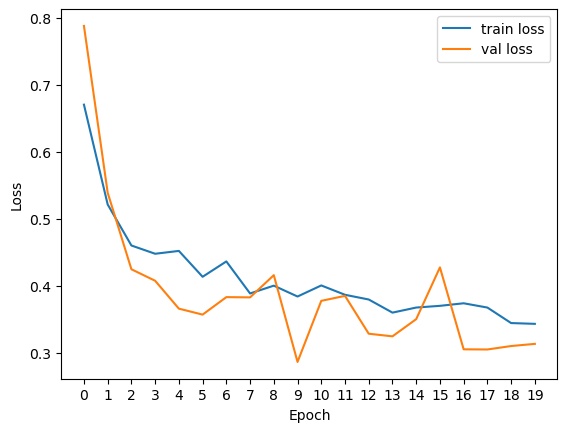

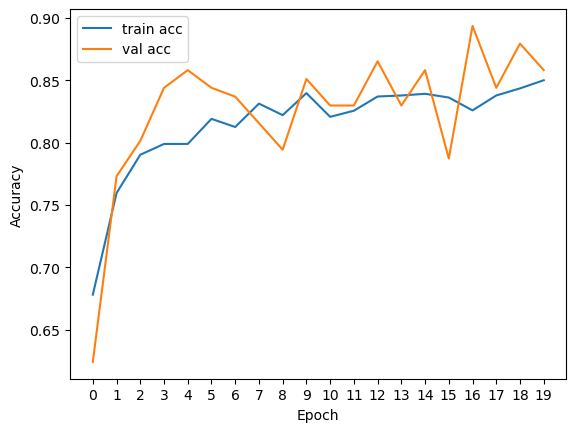

<Figure size 640x480 with 0 Axes>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have r.history containing the loss and accuracy values

# Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

plt.ylabel('Loss')
plt.xlabel('Epoch')

# Convert x-axis and y-axis ticks to integers
plt.xticks(np.arange(0, len(r.history['loss']), 1))


plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# Convert x-axis and y-axis ticks to integers
plt.xticks(np.arange(0, len(r.history['loss']), 1))


plt.show()
plt.savefig('AccVal_acc')


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=r"C:\Users\dell\Desktop\datasets\test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary')

loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

Found 709 images belonging to 2 classes.
23/23 [==============================] - 18s 786ms/step - loss: 0.2694 - accuracy: 0.8829
Test Loss: 0.269
Test Accuracy: 0.883


In [13]:
from sklearn.metrics import confusion_matrix
# Generate predicted class probabilities for test data
y_pred = model.predict_generator(test_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels for test data
y_true_classes = test_generator.classes



# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

[[394   0]
 [315   0]]


In [14]:
from tensorflow.keras.models import load_model

model.save('cnn_model.h5')

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [16]:
 image_path = r"C:\Users\dell\Desktop\datasets\test\tender\1 (2).jpg"
image = load_img(image_path, target_size=(128, 128))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)


In [17]:
model = tf.keras.models.load_model("cnn_model.h5")

In [18]:
image_path = r"C:\Users\dell\Pictures\EBL_EBL_Career-in-Banking_3x14cc.jpg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

prediction = model.predict(image_array)

print(prediction)
if prediction > 0.5:
    print("The image is predicted to belong to class 1 (vacancies).")
else:
    print("The image is predicted to belong to class 0 (tender).")



1/1 [==============================] - 0s 94ms/step
[[0.8974867]]
The image is predicted to belong to class 1 (vacancies).


In [19]:
resnet_50 = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet')
resnet_50.trainable=False

In [20]:
from tensorflow import keras

In [21]:
inputs = keras.Input(shape=(224,224,3))
x = resnet_50(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="my_model")
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
from sklearn.metrics import confusion_matrix
# Generate predicted class probabilities for test data
y_pred = model.predict_generator(test_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels for test data
y_true_classes = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

[[394   0]
 [315   0]]


In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [24]:
 precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f_score = f1_score(y_true_classes, y_pred_classes, average='macro')

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F-score: {:.2f}%".format(f_score * 100))

Precision: 27.79%
Recall: 50.00%
F-score: 35.72%
